### Practice #3

#### Introducción a la ciencia de datos

#### Cielo Aholiva Higuera Gutiérrez

#### El siguiente análisis de práctica se lleva a cabo a partir de un conjunto de datos de housing_data_italy, por lo que se va a evaluar las principales variables importantes de la venta de casas en italia.

##### Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
from sklearn.impute import SimpleImputer

In [8]:
df = pd.read_csv('train_housing_data_italy.csv')
df.head(5)

timestamp      location  \
0  1.661114e+09     siculiana   
1  1.661114e+09     strongoli   
2  1.661114e+09        zelbio   
3  1.661114e+09    villamagna   
4  1.661114e+09  vallefiorita   

                                               title     price  n_rooms  \
0   villa unifamiliare via campo spoto 38, siculiana   46000.0      4.0   
1  quadrilocale contrada tronga 211, tronca, stro...  120000.0      4.0   
2          bilocale buono stato, piano terra, zelbio   55000.0      2.0   
3  casa colonica, da ristrutturare, 319 m², villa...  130000.0      4.0   
4            appartamento corso italia, vallefiorita   30000.0      NaN   

   floor     mq  n_bathrooms  year_of_construction      availability  ...  \
0    NaN   85.0          2.0                   NaN  not free / other  ...   
1    2.0  190.0          2.0                   NaN  not free / other  ...   
2    NaN   85.0          1.0                   NaN  not free / other  ...   
3    NaN  319.0          1.0                   NaN  not free / other  ...   
4    NaN  143.0          2.0                   NaN  not free / other  ...   

  has_balcony has_fireplace has_alarm  has_air_conditioning  has_pool  \
0           0             0         0                     0         0   
1           0             0         0                     0         0   
2           0             1         0                     1         0   
3           0             0         0                     0         0   
4           0             0         0                     1         0   

   has_parking  has_elevator  is_furnished   latitude  longitude  
0            0             0             0  37.338086  13.421996  
1            0             0             0  39.263959  17.052026  
2            0             0             0  45.904582   9.180539  
3            0             0             0  42.333295  14.236808  
4            0             0             0  38.776385  16.461003  

[5 rows x 26 columns]

#### Limpieza de datos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

In [12]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
213404    False
213405    False
213406    False
213407    False
213408    False
Length: 213409, dtype: bool

In [14]:
# Contar cuántos renglones hay antes de eliminar duplicados
initial_count = df.shape[0]

# Quitar renglones duplicados
df2 = df.drop_duplicates()

# Contar cuántos renglones hay después
final_count = df2.shape[0]

# Calcular cuántos se eliminaron
duplicates_removed = initial_count - final_count

# Mostrar el resultado
print(f"Número de renglones duplicados eliminados: {duplicates_removed}")

Número de renglones duplicados eliminados: 822


#### Extracción de características

In [15]:
df2.describe()

timestamp         price        n_rooms          floor  \
count  2.125870e+05  1.755700e+05  154931.000000  143738.000000   
mean   1.661136e+09  2.413344e+05       3.503379       1.820855   
std    1.266642e+04  7.747299e+06       0.985635       1.135121   
min    1.661114e+09  1.000000e+00       2.000000       1.000000   
25%    1.661125e+09  7.700000e+04       3.000000       1.000000   
50%    1.661136e+09  1.350000e+05       3.000000       2.000000   
75%    1.661146e+09  2.350000e+05       4.000000       2.000000   
max    1.661159e+09  2.147484e+09       5.000000      52.000000   

                  mq    n_bathrooms  year_of_construction     has_garage  \
count  208715.000000  198819.000000         212577.000000  212587.000000   
mean      158.819970       1.587856           1965.046633       0.180373   
std       128.763583       0.668236             76.740766       0.384499   
min         1.000000       1.000000           1000.000000       0.000000   
25%        80.000000       1.000000           1960.000000       0.000000   
50%       118.000000       1.000000           1980.000000       0.000000   
75%       189.000000       2.000000           2000.000000       0.000000   
max       999.000000       3.000000           2209.000000       1.000000   

         has_terrace     has_garden    has_balcony  has_fireplace  \
count  212587.000000  212587.000000  212587.000000  212587.000000   
mean        0.111898       0.165114       0.102062       0.054429   
std         0.315241       0.371284       0.302730       0.226864   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           has_alarm  has_air_conditioning       has_pool    has_parking  \
count  212587.000000         212587.000000  212587.000000  212587.000000   
mean        0.009149              0.298560       0.021554       0.015584   
std         0.095213              0.457628       0.145221       0.123860   
min         0.000000              0.000000       0.000000       0.000000   
25%         0.000000              0.000000       0.000000       0.000000   
50%         0.000000              0.000000       0.000000       0.000000   
75%         0.000000              1.000000       0.000000       0.000000   
max         1.000000              1.000000       1.000000       1.000000   

        has_elevator   is_furnished       latitude      longitude  
count  212587.000000  212587.000000  212527.000000  212527.000000  
mean        0.056974       0.077559      43.744832      11.245098  
std         0.231794       0.267477       2.355491       2.630639  
min         0.000000       0.000000      35.511134       6.703205  
25%         0.000000       0.000000      42.229827       9.130121  
50%         0.000000       0.000000      44.749384      10.846248  
75%         0.000000       0.000000      45.575651      13.045690  
max         1.000000       1.000000      47.003740      18.492161

In [16]:
# Categorical columns
cat_col = [col for col in df2.columns if df2[col].dtype == 'object']
print('Categorical columns :', cat_col)
# Numerical columns
num_col = [col for col in df2.columns if df2[col].dtype != 'object']
print('Numerical columns :' ,num_col)

Categorical columns : ['location', 'title', 'availability', 'energy_class', 'status', 'heating']
Numerical columns : ['timestamp', 'price', 'n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'latitude', 'longitude']


In [18]:
print("¿Cuántas variables tiene la columna categorica?")
df2[cat_col].nunique() # Cuantas variables tiene cada uno.

¿Cuántas variables tiene la columna categorica?


location          7023
title           190951
availability         1
energy_class        12
status               1
heating              2
dtype: int64

In [20]:
print("¿Cuántas variables tiene la columna númerica?")
df2[num_col].nunique()

¿Cuántas variables tiene la columna númerica?


timestamp               42196
price                    2785
n_rooms                     4
floor                      22
mq                        976
n_bathrooms                 3
year_of_construction      387
has_garage                  2
has_terrace                 2
has_garden                  2
has_balcony                 2
has_fireplace               2
has_alarm                   2
has_air_conditioning        2
has_pool                    2
has_parking                 2
has_elevator                2
is_furnished                2
latitude                 7009
longitude                7011
dtype: int64

In [22]:
df2.floor.value_counts()

floor
1.0     68701
2.0     49036
3.0     16737
4.0      5288
5.0      2248
6.0       928
7.0       408
8.0       169
9.0       118
10.0       38
11.0       23
12.0       15
16.0        6
15.0        6
49.0        5
17.0        4
13.0        3
52.0        1
22.0        1
23.0        1
50.0        1
14.0        1
Name: count, dtype: int64

In [24]:
df2['location'].unique()[:50]

array(['siculiana', 'strongoli', 'zelbio', 'villamagna', 'vallefiorita',
       'zafferana etnea', 'ururi', 'zumpano', 'vinchiaturo', 'vitulazio',
       'volongo', 'vitorchiano', 'viterbo',
       'villa san giovanni in tuscia', 'vignanello', 'vejano',
       'vasanello', 'vallerano', 'vetralla', 'valentano', 'tessennano',
       'tarquinia', 'san lorenzo nuovo', 'orte', 'piansano', 'tuscania',
       'sutri', 'proceno', 'soriano nel cimino', 'ronciglione',
       'oriolo romano', 'onano', 'montalto di castro', 'lubriano',
       'monte romano', 'latera', 'ischia di castro', 'marta', 'nepi',
       'monterosi', 'montefiascone', 'corchiano', 'cellere', 'celleno',
       'castiglione in teverina', 'gradoli', 'gallese', 'fabrica di roma',
       "civitella d'agliano", 'civita castellana'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Ajustar y transformar la columna
df2['location_encoded'] = label_encoder.fit_transform(df2['location'])
df2['energy_class_encoded'] = label_encoder.fit_transform(df2['energy_class'])
print(df2.head(5))

      timestamp      location  \
0  1.661114e+09     siculiana   
1  1.661114e+09     strongoli   
2  1.661114e+09        zelbio   
3  1.661114e+09    villamagna   
4  1.661114e+09  vallefiorita   

                                               title     price  n_rooms  \
0   villa unifamiliare via campo spoto 38, siculiana   46000.0      4.0   
1  quadrilocale contrada tronga 211, tronca, stro...  120000.0      4.0   
2          bilocale buono stato, piano terra, zelbio   55000.0      2.0   
3  casa colonica, da ristrutturare, 319 m², villa...  130000.0      4.0   
4            appartamento corso italia, vallefiorita   30000.0      NaN   

   floor     mq  n_bathrooms  year_of_construction      availability  ...  \
0    NaN   85.0          2.0                   NaN  not free / other  ...   
1    2.0  190.0          2.0                   NaN  not free / other  ...   
2    NaN   85.0          1.0                   NaN  not free / other  ...   
3    NaN  319.0          1.0              

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\3437231571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location_encoded'] = label_encoder.fit_transform(df2['location'])
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\3437231571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['energy_class_encoded'] = label_encoder.fit_transform(df2['energy_class'])


In [28]:
print("Before: ", df2.shape)
df1 = df2.drop(columns=['timestamp', 'location', 'title', 'availability', 'status', 'heating', 'energy_class'])
print("After", df1.shape)

Before:  (212587, 28)
After (212587, 21)


In [30]:
# Contar cuántos datos se van a eliminar
count_to_remove = df1[df1['year_of_construction'] > 2024].shape[0]
print(f"Número de datos que se van a eliminar: {count_to_remove}")

# Filtrar el DataFrame
df3 = df1[df1['year_of_construction'] <= 2024]

Número de datos que se van a eliminar: 32


In [32]:
round((df3.isnull().sum()/df3.shape[0])*100,2)

price                   17.41
n_rooms                 27.12
floor                   32.38
mq                       1.82
n_bathrooms              6.48
year_of_construction     0.00
has_garage               0.00
has_terrace              0.00
has_garden               0.00
has_balcony              0.00
has_fireplace            0.00
has_alarm                0.00
has_air_conditioning     0.00
has_pool                 0.00
has_parking              0.00
has_elevator             0.00
is_furnished             0.00
latitude                 0.03
longitude                0.03
location_encoded         0.00
energy_class_encoded     0.00
dtype: float64

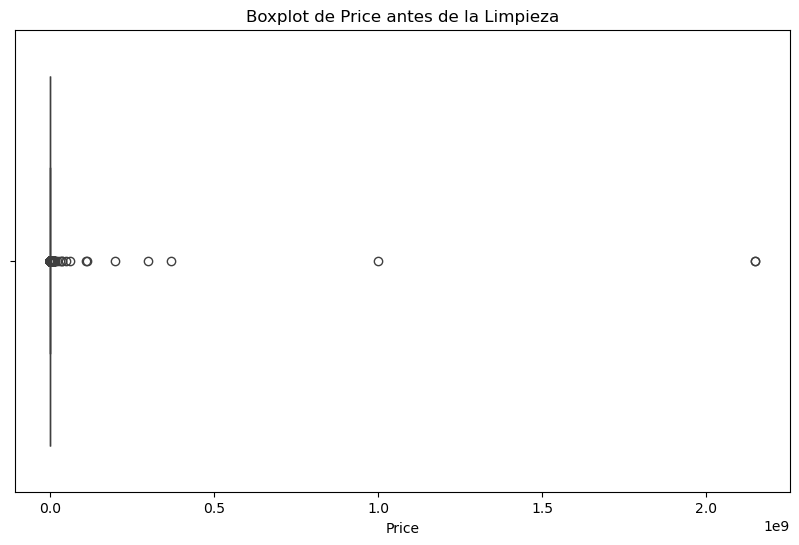

In [34]:
# Bloxplot de Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df3['price'])
plt.title('Boxplot de Price antes de la Limpieza')
plt.xlabel('Price')
plt.show()

In [36]:
# Obtener el cuartiles
Q1 = df3['price'].quantile(0.25)
Q3 = df3['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df3[(df3['price'] < lower_bound) | (df3['price'] > upper_bound)]
print("Número de outliers:", outliers.shape[0])

Número de outliers: 11878


In [38]:
df4 = df3[(df3['price'] >= lower_bound) & (df3['price'] <= upper_bound)]
print("Número de datos después de eliminar outliers:", df4.shape[0])

Número de datos después de eliminar outliers: 163657


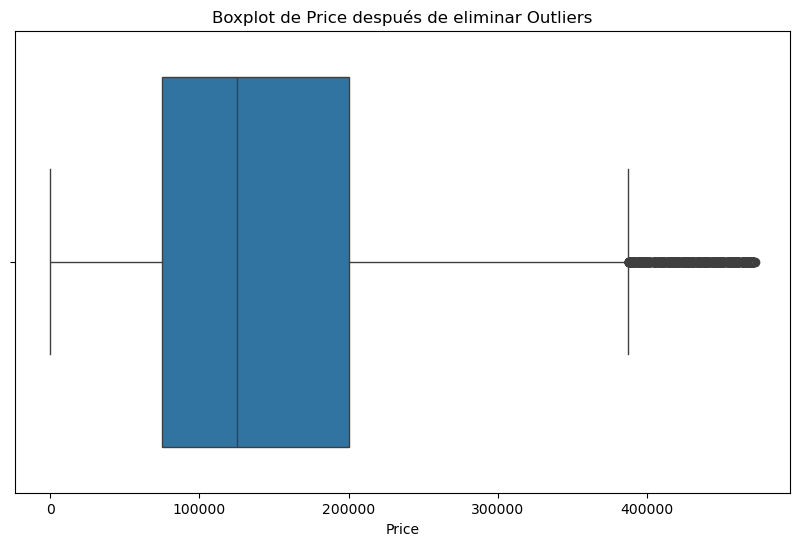

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df4['price'])
plt.title('Boxplot de Price después de eliminar Outliers')
plt.xlabel('Price')
plt.show()

#### Análisis exploratorio de los datos.

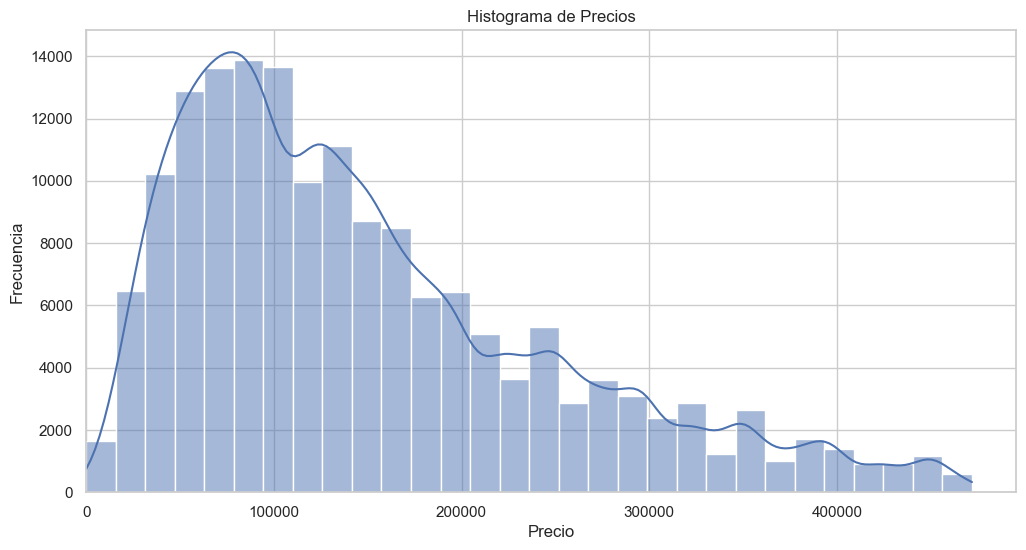

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(df4['price'], bins=30, kde=True) 
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xlim(left=0)
plt.show()

In [44]:
df4.describe()

price        n_rooms          floor             mq  \
count  163657.000000  127162.000000  110780.000000  162381.000000   
mean   150255.737365       3.456827       1.812132     145.105924   
std    100494.657301       0.975875       1.139975     109.074370   
min         1.000000       2.000000       1.000000       1.000000   
25%     75000.000000       3.000000       1.000000      80.000000   
50%    125000.000000       3.000000       2.000000     110.000000   
75%    200000.000000       4.000000       2.000000     171.000000   
max    472000.000000       5.000000      52.000000     999.000000   

         n_bathrooms  year_of_construction     has_garage    has_terrace  \
count  157967.000000         163657.000000  163657.000000  163657.000000   
mean        1.550476           1965.960759       0.200022       0.121351   
std         0.645341             71.785372       0.400018       0.326536   
min         1.000000           1000.000000       0.000000       0.000000   
25%         1.000000           1960.000000       0.000000       0.000000   
50%         1.000000           1980.000000       0.000000       0.000000   
75%         2.000000           2001.000000       0.000000       0.000000   
max         3.000000           2024.000000       1.000000       1.000000   

          has_garden    has_balcony  ...      has_alarm  has_air_conditioning  \
count  163657.000000  163657.000000  ...  163657.000000         163657.000000   
mean        0.178837       0.114184  ...       0.009905              0.313491   
std         0.383217       0.318036  ...       0.099029              0.463913   
min         0.000000       0.000000  ...       0.000000              0.000000   
25%         0.000000       0.000000  ...       0.000000              0.000000   
50%         0.000000       0.000000  ...       0.000000              0.000000   
75%         0.000000       0.000000  ...       0.000000              1.000000   
max         1.000000       1.000000  ...       1.000000              1.000000   

            has_pool    has_parking   has_elevator   is_furnished  \
count  163657.000000  163657.000000  163657.000000  163657.000000   
mean        0.014665       0.017213       0.067299       0.076385   
std         0.120208       0.130064       0.250540       0.265615   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

            latitude      longitude  location_encoded  energy_class_encoded  
count  163611.000000  163611.000000     163657.000000         163657.000000  
mean       43.803258      11.169727       3478.805337              9.249528  
std         2.333178       2.638311       2031.534640              2.872380  
min        35.511134       6.703205          0.000000              0.000000  
25%        42.322961       9.050609       1712.000000              9.000000  
50%        44.794133      10.739974       3452.000000             11.000000  
75%        45.582831      13.018887       5221.000000             11.000000  
max        47.003740      18.492161       7022.000000             12.000000  

[8 rows x 21 columns]

In [46]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163657 entries, 10 to 213408
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 163657 non-null  float64
 1   n_rooms               127162 non-null  float64
 2   floor                 110780 non-null  float64
 3   mq                    162381 non-null  float64
 4   n_bathrooms           157967 non-null  float64
 5   year_of_construction  163657 non-null  float64
 6   has_garage            163657 non-null  int64  
 7   has_terrace           163657 non-null  int64  
 8   has_garden            163657 non-null  int64  
 9   has_balcony           163657 non-null  int64  
 10  has_fireplace         163657 non-null  int64  
 11  has_alarm             163657 non-null  int64  
 12  has_air_conditioning  163657 non-null  int64  
 13  has_pool              163657 non-null  int64  
 14  has_parking           163657 non-null  int64  
 15  has_

In [52]:
df4.isna().sum() / len(df4)

price                   0.000000
n_rooms                 0.222997
floor                   0.323096
mq                      0.007797
n_bathrooms             0.034768
year_of_construction    0.000000
has_garage              0.000000
has_terrace             0.000000
has_garden              0.000000
has_balcony             0.000000
has_fireplace           0.000000
has_alarm               0.000000
has_air_conditioning    0.000000
has_pool                0.000000
has_parking             0.000000
has_elevator            0.000000
is_furnished            0.000000
latitude                0.000281
longitude               0.000281
location_encoded        0.000000
energy_class_encoded    0.000000
dtype: float64

In [54]:
# Imputar la mediana para las columnas numéricas
median_imputer = SimpleImputer(strategy='median')

# Columnas numéricas para imputar con la mediana
num_cols = ['latitude', 'longitude', 'mq']
df4[num_cols] = median_imputer.fit_transform(df4[num_cols])

# Imputar la moda para las columnas categóricas
mode_imputer = SimpleImputer(strategy='most_frequent')

# Columnas categóricas para imputar con la moda
cat_cols = ['n_rooms', 'floor', 'n_bathrooms']
df4[cat_cols] = mode_imputer.fit_transform(df4[cat_cols])

# Verificar si hay valores nulos restantes
print('\nNulos en los datos después de la imputación:\n', df4.isnull().sum())


Nulos en los datos después de la imputación:
 price                   0
n_rooms                 0
floor                   0
mq                      0
n_bathrooms             0
year_of_construction    0
has_garage              0
has_terrace             0
has_garden              0
has_balcony             0
has_fireplace           0
has_alarm               0
has_air_conditioning    0
has_pool                0
has_parking             0
has_elevator            0
is_furnished            0
latitude                0
longitude               0
location_encoded        0
energy_class_encoded    0
dtype: int64


C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\3184746971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[num_cols] = median_imputer.fit_transform(df4[num_cols])
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\3184746971.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[cat_cols] = mode_imputer.fit_transform(df4[cat_cols])


<Figure size 1200x1000 with 0 Axes>

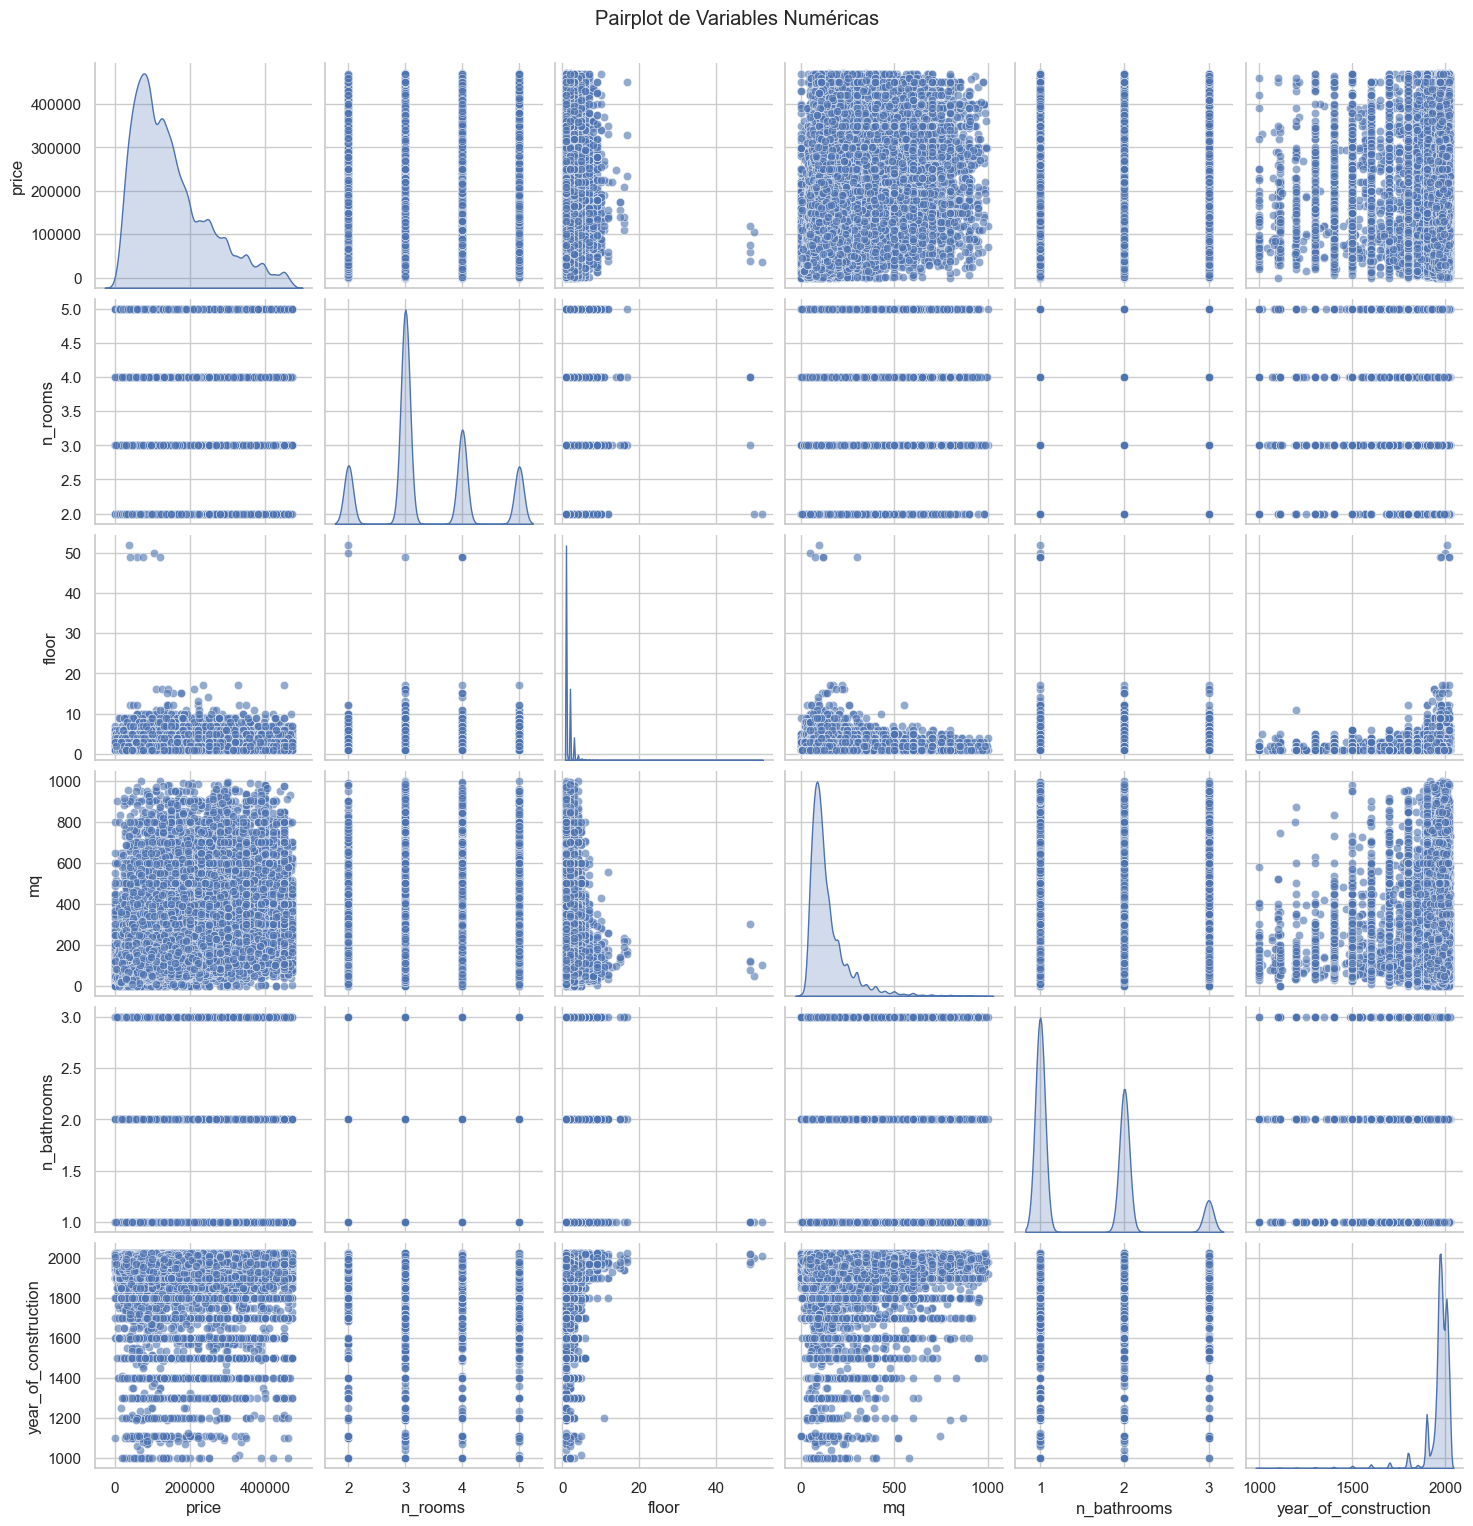

In [56]:
numeric_columns = ['price', 'n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction']
plt.figure(figsize=(12, 10))
sns.pairplot(df4[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()

#### Selección de Características

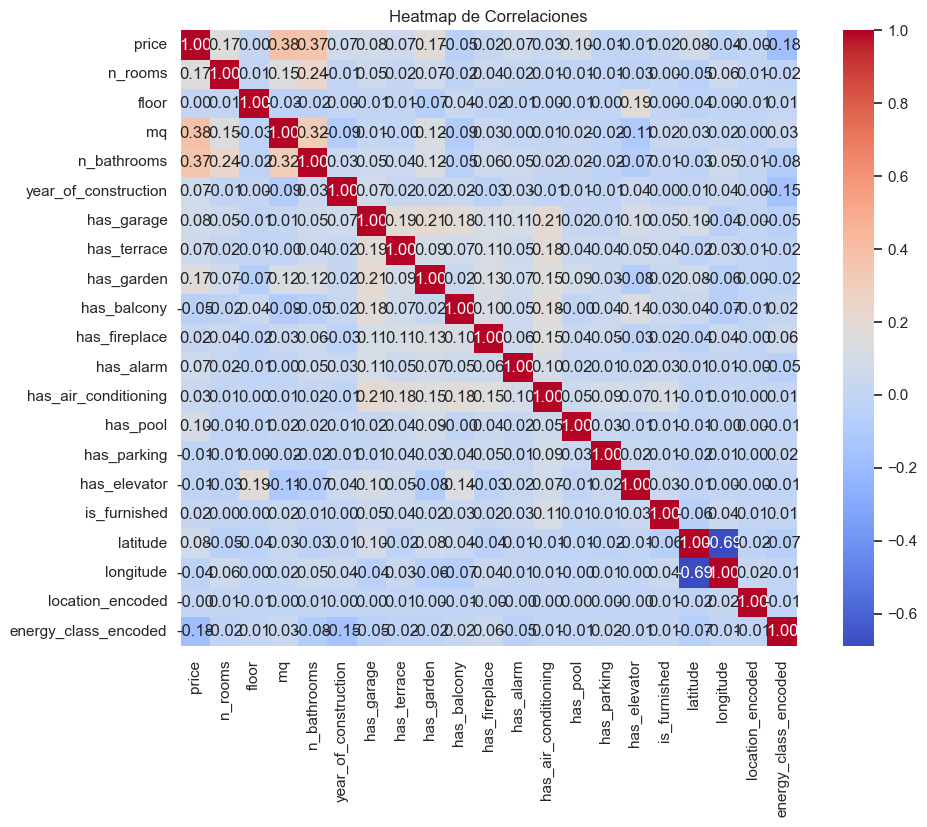

In [58]:
correlation_matrix = df4.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Heatmap de Correlaciones')
plt.show()

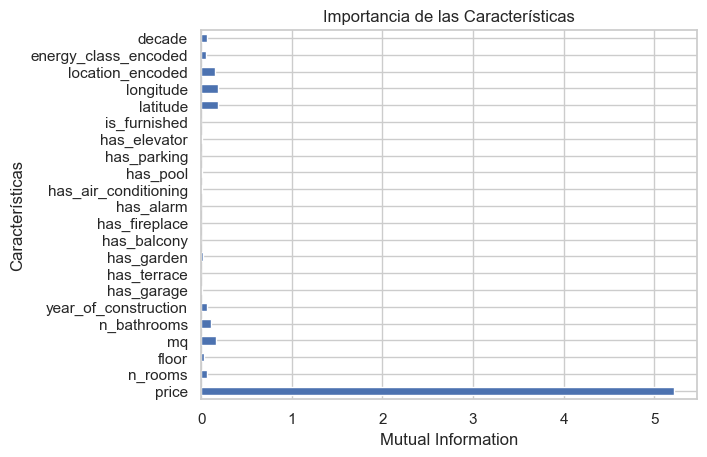

Execution time: 104.59 seconds


In [66]:
import time
from sklearn.feature_selection import mutual_info_classif
X = df4.select_dtypes(include=[np.number])
y = df4['price']

if len(X) != len(y):
    raise ValueError("Las longitudes de X e y no coinciden.")

# Start time
start_time_forward = time.time()
X_new = mutual_info_classif(X, y)

# End time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

feat_imp = pd.Series(X_new, index=X.columns)
feat_imp.plot(kind='barh')
plt.title('Importancia de las Características')
plt.xlabel('Mutual Information')
plt.ylabel('Características')
plt.show()
print(f"Execution time: {time_forward:.2f} seconds")

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\376506754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['decade'] = (df4['year_of_construction'] // 10) * 10
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\376506754.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x=var, y="price", data=data, palette=palette)


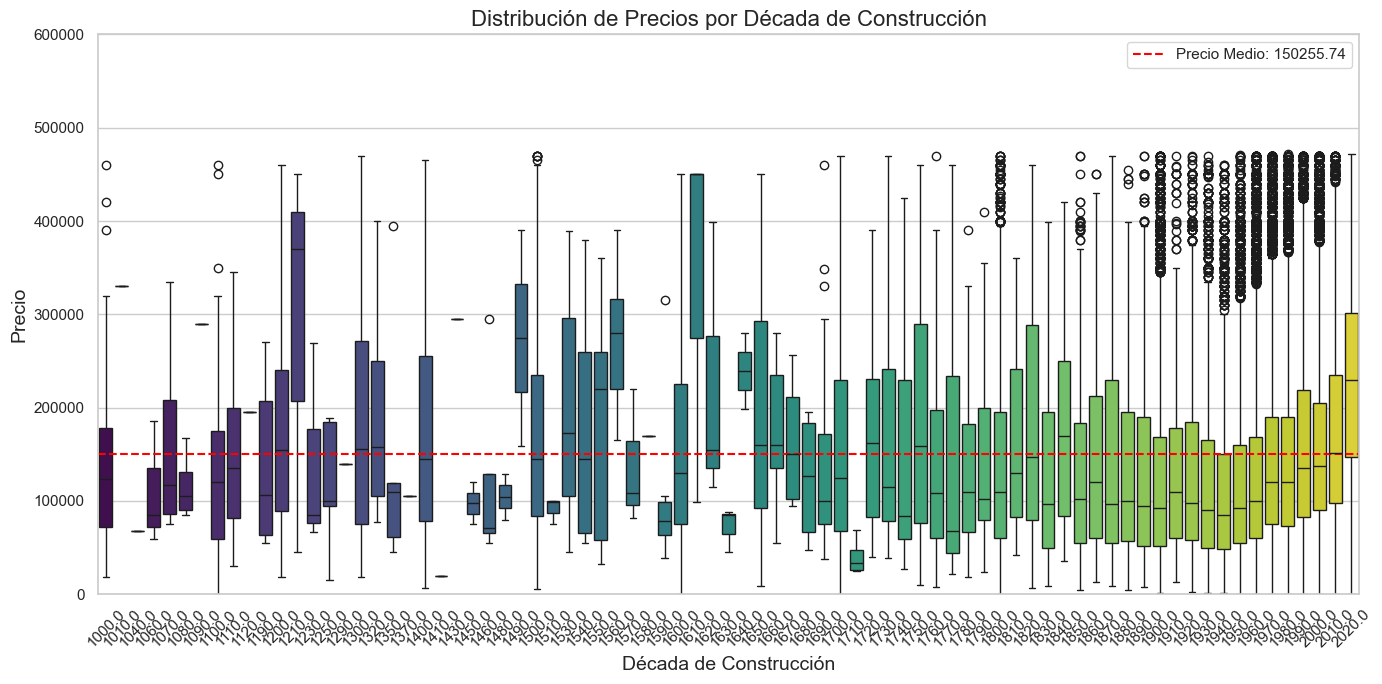

In [60]:
df4['decade'] = (df4['year_of_construction'] // 10) * 10
var = 'decade'
data = pd.concat([df4['price'], df4[var]], axis=1)

plt.figure(figsize=(14, 7))

sns.set(style="whitegrid") 
palette = sns.color_palette("viridis", len(data[var].unique()))
fig = sns.boxplot(x=var, y="price", data=data, palette=palette)

fig.axis(ymin=0, ymax=600000)

plt.xticks(rotation=45)
plt.title('Distribución de Precios por Década de Construcción', fontsize=16)
plt.xlabel('Década de Construcción', fontsize=14)
plt.ylabel('Precio', fontsize=14)

mean_price = data['price'].mean()
plt.axhline(mean_price, color='red', linestyle='--', label=f'Precio Medio: {mean_price:.2f}')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Aplicación de una técnica de reducción de dimensionalidad

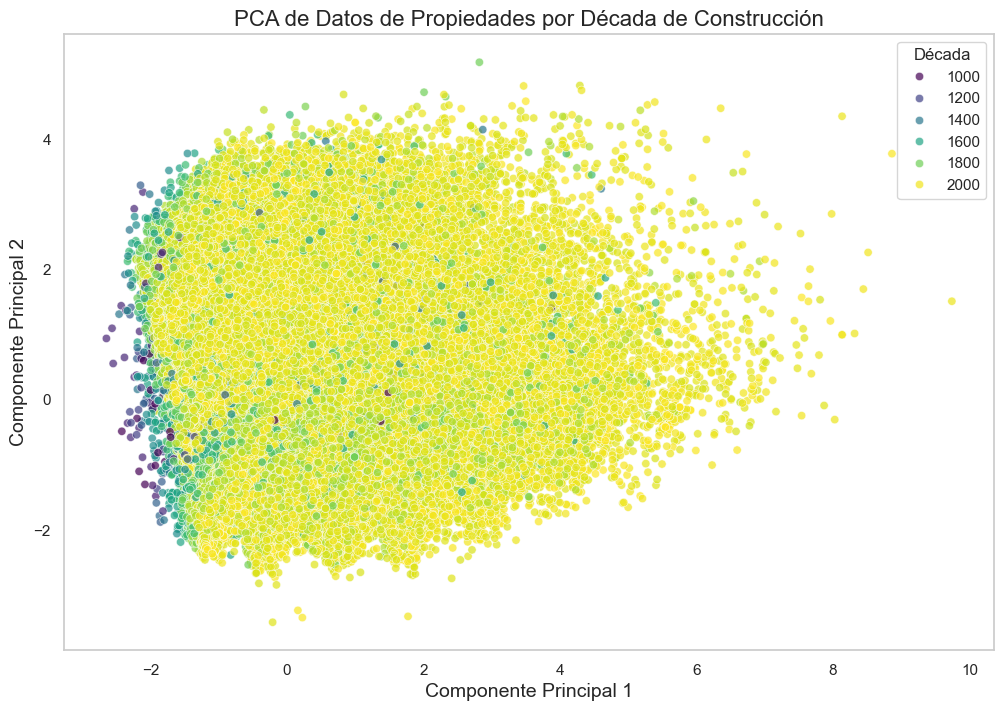

In [68]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = df4.drop(['price', 'decade'], axis=1) 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['decade'] = df4['decade'].values

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='decade', palette='viridis', alpha=0.7)
plt.title('PCA de Datos de Propiedades por Década de Construcción', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.legend(title='Década')
plt.grid()
plt.show()

#### Modelos de regresión

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df4.drop('price', axis=1)
y = df4['price']

train_input, test_input, train_output, test_output = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(train_input, train_output)

print(f'Score del modelo: {reg.score(test_input, test_output)}')

Score del modelo: 0.27707585578967353


In [72]:
# Function to evaluate models and plot predictions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train) # Hacer ajuste
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'Model: {model_name}')
    print(f'Train R^2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R^2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')
    print('-'*40)
    
    # Plot the predictions vs real values
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred_test, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model: Lasso Regression
Train R^2: 0.2801
Test R^2: 0.2771
Test RMSE: 85289.7700
----------------------------------------


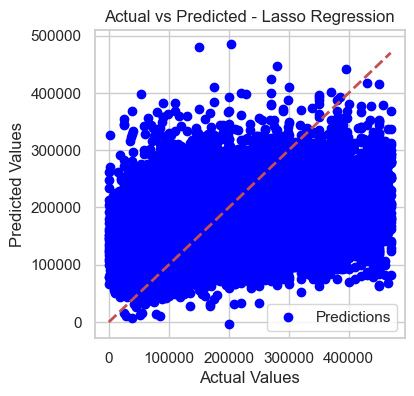

In [78]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lasso_reg = Lasso(alpha=0.1, max_iter=10000)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

In [99]:
lasso_reg = Lasso(alpha=1.0)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df4.drop('price', axis=1)
y = df4['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Función para evaluar el modelo
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f'{model_name} - MSE: {mse:.2f}, R^2: {r2:.2f}')

# Modelos de regresión
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

lasso_reg = Lasso(alpha=0.1, max_iter=10000)  # Aumentar max_iter
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

Linear Regression - MSE: 7274346206.98, R^2: 0.28
Ridge Regression - MSE: 7274343940.74, R^2: 0.28
Lasso Regression - MSE: 7274344859.45, R^2: 0.28
Random Forest Regression - MSE: 4705986795.14, R^2: 0.53


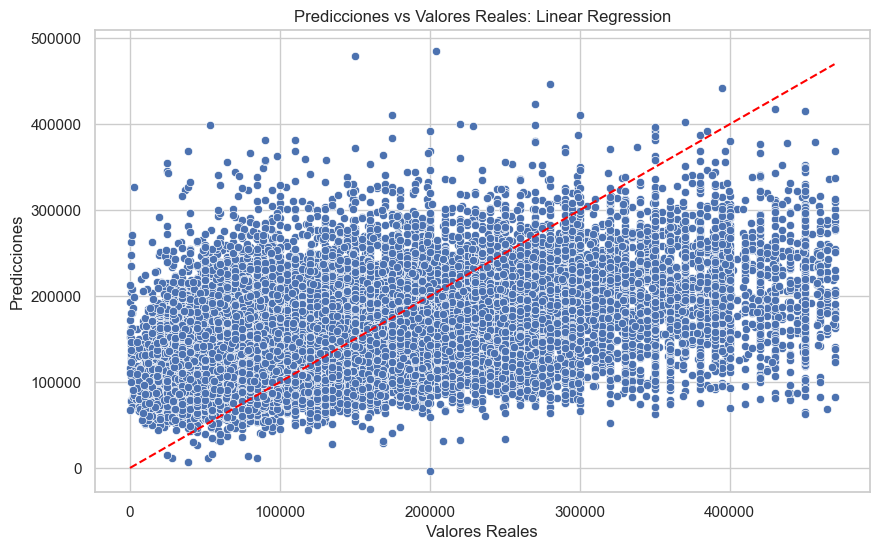

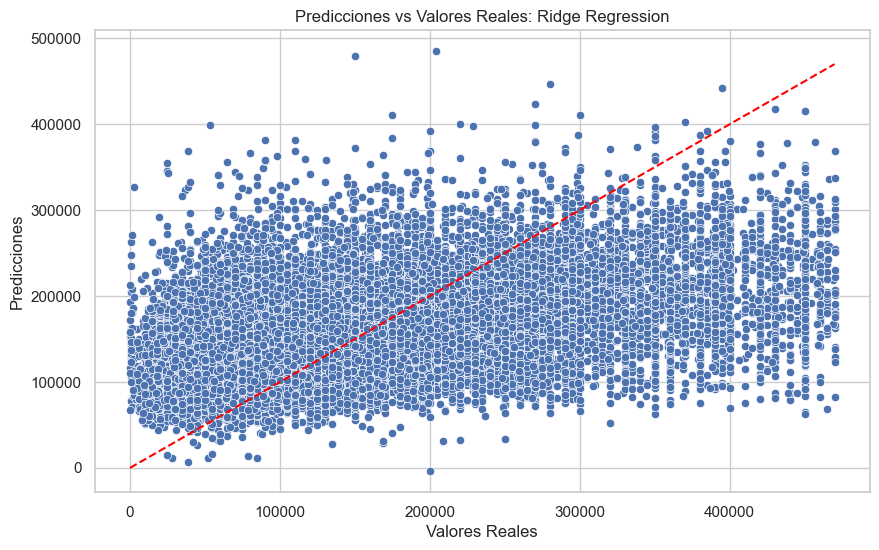

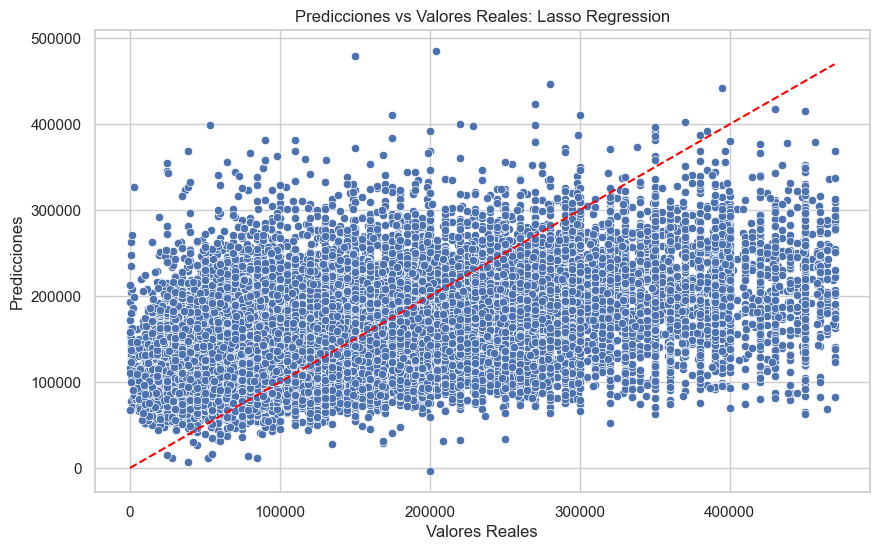

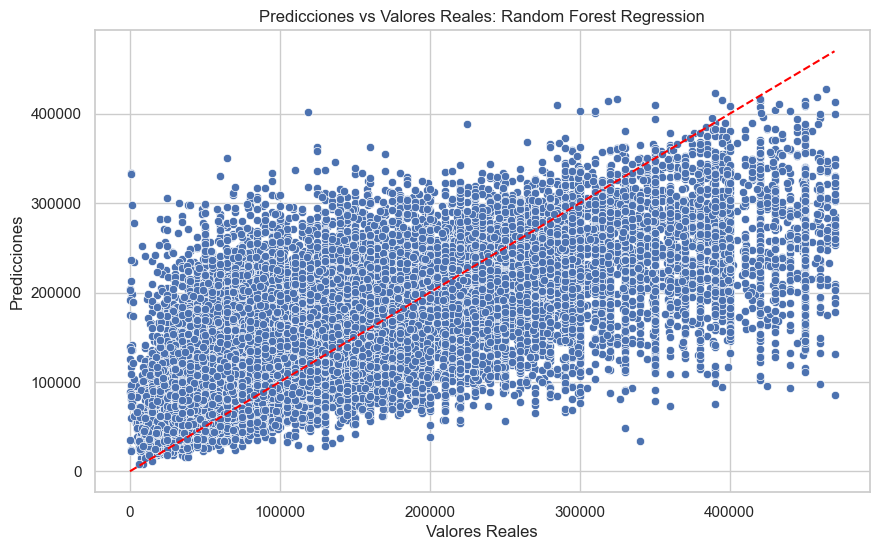

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_predictions(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=predictions)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Línea de referencia
    plt.title(f'Predicciones vs Valores Reales: {model_name}')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.grid(True)
    plt.show()


linear_reg.fit(X_train, y_train)  
plot_predictions(linear_reg, X_test, y_test, 'Linear Regression')

ridge_reg.fit(X_train, y_train)
plot_predictions(ridge_reg, X_test, y_test, 'Ridge Regression')

lasso_reg.fit(X_train, y_train)
plot_predictions(lasso_reg, X_test, y_test, 'Lasso Regression')

rf_reg.fit(X_train, y_train)
plot_predictions(rf_reg, X_test, y_test, 'Random Forest Regression')

### Método #2

##### En este apartado se realizara otro tipo de limpieza, se eliminará los renglones que no tenga ningún valor en la columna de Price, por lo que se procesarán un conjunto de datos más pequeño. Así mismo, no se considera la columna de floor y ninguna columna categorica anteriormente descrita.

### Limpieza de datos 

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

In [86]:
# Contar cuántos renglones hay antes de eliminar duplicados
initial_count = df.shape[0]
# Quitar renglones duplicados
dfh = df.drop_duplicates()
# Contar cuántos renglones hay después
final_count = dfh.shape[0]
# Calcular cuántos se eliminaron
duplicates_removed = initial_count - final_count
# Mostrar el resultado
print(f"Número de renglones duplicados eliminados: {duplicates_removed}")

Número de renglones duplicados eliminados: 822


In [88]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfh['location_encoded'] = label_encoder.fit_transform(dfh['location'])
dfh['energy_class_encoded'] = label_encoder.fit_transform(dfh['energy_class'])
print(dfh.head(5))

      timestamp      location  \
0  1.661114e+09     siculiana   
1  1.661114e+09     strongoli   
2  1.661114e+09        zelbio   
3  1.661114e+09    villamagna   
4  1.661114e+09  vallefiorita   

                                               title     price  n_rooms  \
0   villa unifamiliare via campo spoto 38, siculiana   46000.0      4.0   
1  quadrilocale contrada tronga 211, tronca, stro...  120000.0      4.0   
2          bilocale buono stato, piano terra, zelbio   55000.0      2.0   
3  casa colonica, da ristrutturare, 319 m², villa...  130000.0      4.0   
4            appartamento corso italia, vallefiorita   30000.0      NaN   

   floor     mq  n_bathrooms  year_of_construction      availability  ...  \
0    NaN   85.0          2.0                   NaN  not free / other  ...   
1    2.0  190.0          2.0                   NaN  not free / other  ...   
2    NaN   85.0          1.0                   NaN  not free / other  ...   
3    NaN  319.0          1.0              

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\341836796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh['location_encoded'] = label_encoder.fit_transform(dfh['location'])
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\341836796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh['energy_class_encoded'] = label_encoder.fit_transform(dfh['energy_class'])


In [90]:
print("Before: ", dfh.shape)
dfh1 = dfh.drop(columns=['timestamp', 'location', 'title', 'availability', 'status', 'heating', 'energy_class', 'floor'])
print("After", dfh1.shape)

Before:  (212587, 28)
After (212587, 20)


In [92]:
count_to_remove = dfh1[dfh1['year_of_construction'] > 2024].shape[0]
print(f"Número de datos que se van a eliminar: {count_to_remove}")

dfh2 = dfh1[dfh1['year_of_construction'] <= 2024]

Número de datos que se van a eliminar: 32


In [94]:
round((dfh2.isnull().sum()/dfh2.shape[0])*100,2)

price                   17.41
n_rooms                 27.12
mq                       1.82
n_bathrooms              6.48
year_of_construction     0.00
has_garage               0.00
has_terrace              0.00
has_garden               0.00
has_balcony              0.00
has_fireplace            0.00
has_alarm                0.00
has_air_conditioning     0.00
has_pool                 0.00
has_parking              0.00
has_elevator             0.00
is_furnished             0.00
latitude                 0.03
longitude                0.03
location_encoded         0.00
energy_class_encoded     0.00
dtype: float64

In [96]:
filas_iniciales = dfh2.shape[0]
# Eliminamos las filas donde 'price' tiene valores faltantes
dfh3 = dfh2[dfh2['price'].notna()]
# Calculamos cuántas filas hay después de la eliminación
filas_finales = dfh3.shape[0]
# Calculamos cuántas filas se eliminaron
filas_eliminadas = filas_iniciales - filas_finales
print(f'Filas eliminadas: {filas_eliminadas}')

Filas eliminadas: 37010


In [98]:
dfh3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175535 entries, 10 to 213408
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 175535 non-null  float64
 1   n_rooms               131458 non-null  float64
 2   mq                    173006 non-null  float64
 3   n_bathrooms           165132 non-null  float64
 4   year_of_construction  175535 non-null  float64
 5   has_garage            175535 non-null  int64  
 6   has_terrace           175535 non-null  int64  
 7   has_garden            175535 non-null  int64  
 8   has_balcony           175535 non-null  int64  
 9   has_fireplace         175535 non-null  int64  
 10  has_alarm             175535 non-null  int64  
 11  has_air_conditioning  175535 non-null  int64  
 12  has_pool              175535 non-null  int64  
 13  has_parking           175535 non-null  int64  
 14  has_elevator          175535 non-null  int64  
 15  is_f

In [100]:
round((dfh3.isnull().sum()/dfh3.shape[0])*100,2)

price                    0.00
n_rooms                 25.11
mq                       1.44
n_bathrooms              5.93
year_of_construction     0.00
has_garage               0.00
has_terrace              0.00
has_garden               0.00
has_balcony              0.00
has_fireplace            0.00
has_alarm                0.00
has_air_conditioning     0.00
has_pool                 0.00
has_parking              0.00
has_elevator             0.00
is_furnished             0.00
latitude                 0.03
longitude                0.03
location_encoded         0.00
energy_class_encoded     0.00
dtype: float64

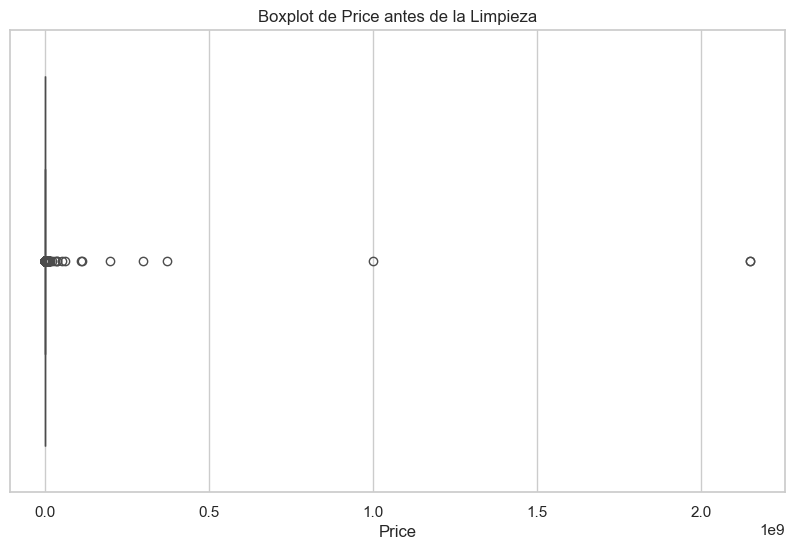

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dfh3['price'])
plt.title('Boxplot de Price antes de la Limpieza')
plt.xlabel('Price')
plt.show()

In [104]:
# Calcular el IQR
Q1 = dfh3['price'].quantile(0.25)
Q3 = dfh3['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dfh3[(dfh3['price'] < lower_bound) | (dfh3['price'] > upper_bound)]
print("Número de outliers:", outliers.shape[0])

Número de outliers: 11878


In [106]:
dfh4 = dfh3[(dfh3['price'] >= lower_bound) & (dfh3['price'] <= upper_bound)]
print("Número de datos después de eliminar outliers:", dfh4.shape[0])

Número de datos después de eliminar outliers: 163657


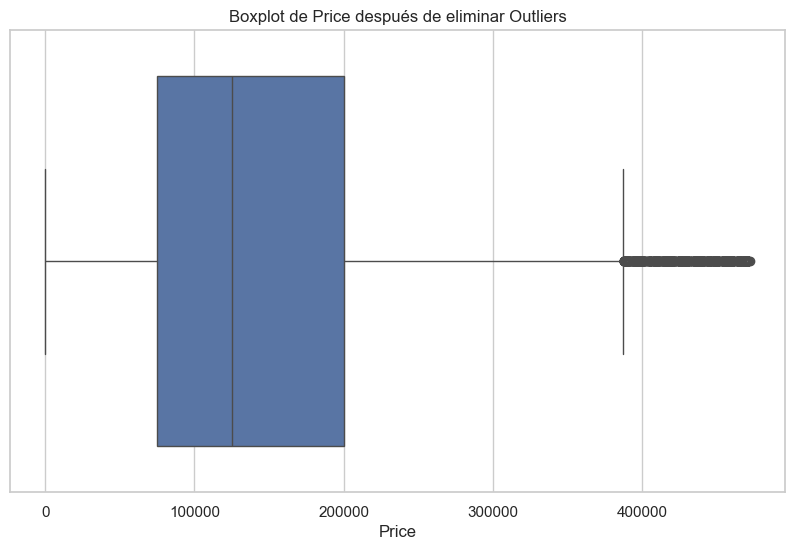

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dfh4['price'])
plt.title('Boxplot de Price después de eliminar Outliers')
plt.xlabel('Price')
plt.show()

In [110]:
round((dfh4.isnull().sum()/dfh4.shape[0])*100,2)

price                    0.00
n_rooms                 22.30
mq                       0.78
n_bathrooms              3.48
year_of_construction     0.00
has_garage               0.00
has_terrace              0.00
has_garden               0.00
has_balcony              0.00
has_fireplace            0.00
has_alarm                0.00
has_air_conditioning     0.00
has_pool                 0.00
has_parking              0.00
has_elevator             0.00
is_furnished             0.00
latitude                 0.03
longitude                0.03
location_encoded         0.00
energy_class_encoded     0.00
dtype: float64

In [112]:
# Imputar la mediana para las columnas numéricas
median_imputer = SimpleImputer(strategy='median')
# Columnas numéricas para imputar con la mediana
num_cols = ['latitude', 'longitude', 'mq']
dfh4[num_cols] = median_imputer.fit_transform(dfh4[num_cols])
# Imputar la moda para las columnas categóricas
mode_imputer = SimpleImputer(strategy='most_frequent')
# Columnas categóricas para imputar con la moda
cat_cols = ['n_rooms', 'n_bathrooms']
dfh4[cat_cols] = mode_imputer.fit_transform(dfh4[cat_cols])

print('\nNulos en los datos después de la imputación:\n', dfh4.isnull().sum())


Nulos en los datos después de la imputación:
 price                   0
n_rooms                 0
mq                      0
n_bathrooms             0
year_of_construction    0
has_garage              0
has_terrace             0
has_garden              0
has_balcony             0
has_fireplace           0
has_alarm               0
has_air_conditioning    0
has_pool                0
has_parking             0
has_elevator            0
is_furnished            0
latitude                0
longitude               0
location_encoded        0
energy_class_encoded    0
dtype: int64


C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\3846404372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh4[num_cols] = median_imputer.fit_transform(dfh4[num_cols])
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\3846404372.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh4[cat_cols] = mode_imputer.fit_transform(dfh4[cat_cols])


#### Análisis exploratorio de los datos.

<Figure size 1200x1000 with 0 Axes>

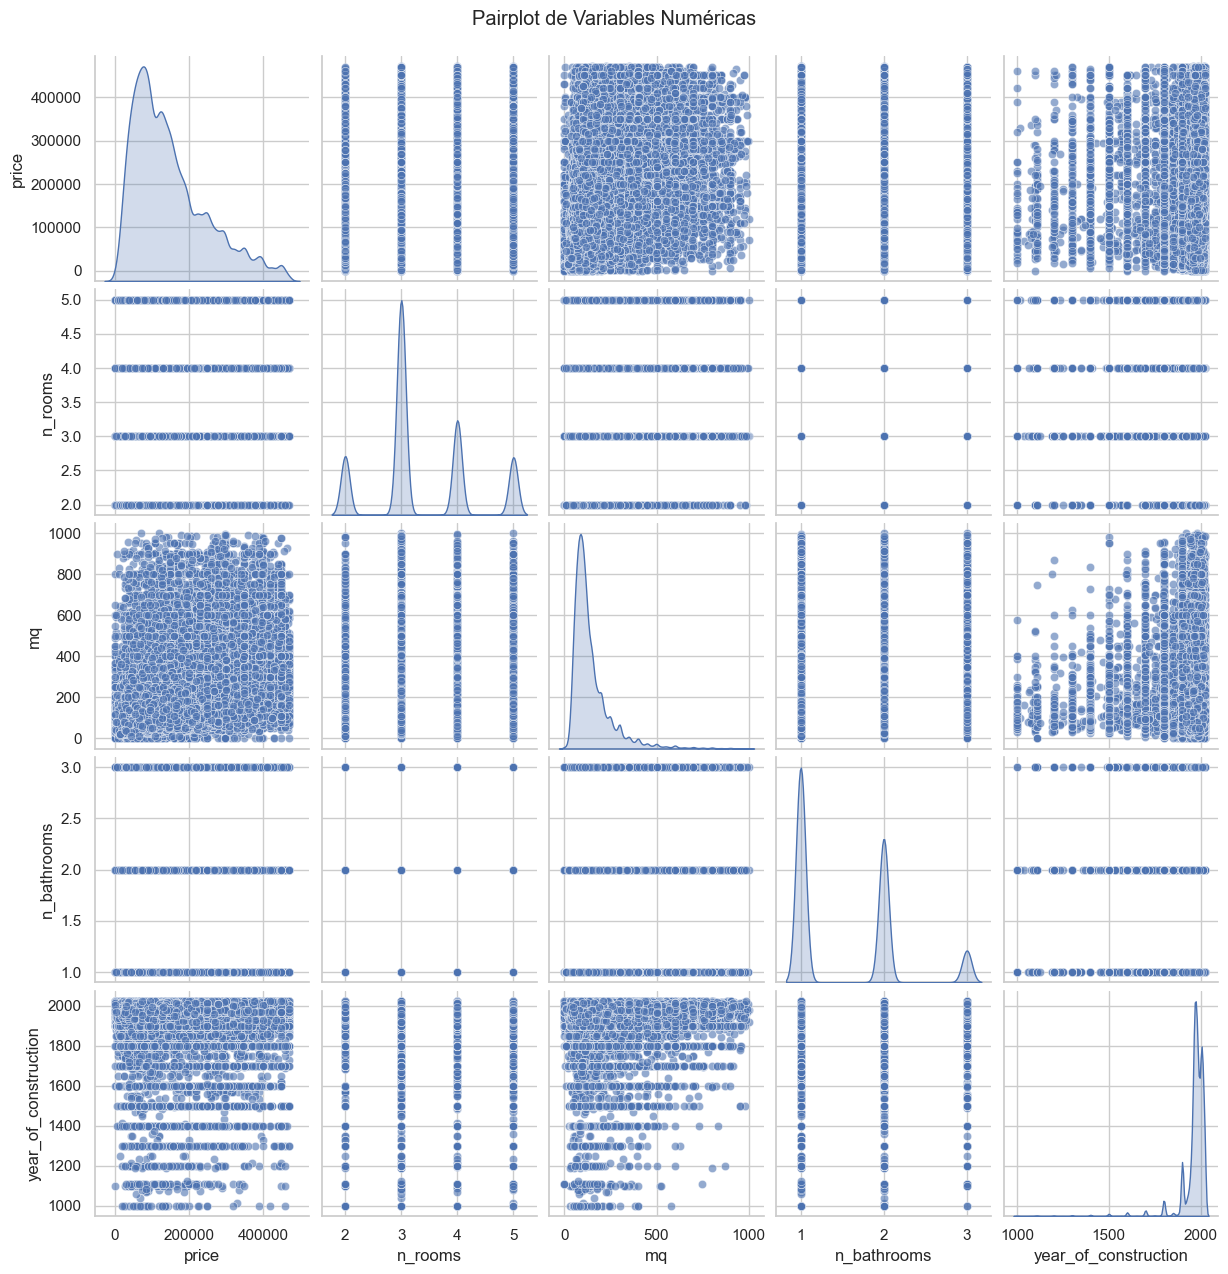

In [114]:
numeric_columns = ['price', 'n_rooms', 'mq', 'n_bathrooms', 'year_of_construction']
plt.figure(figsize=(12, 10))
sns.pairplot(dfh4[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()

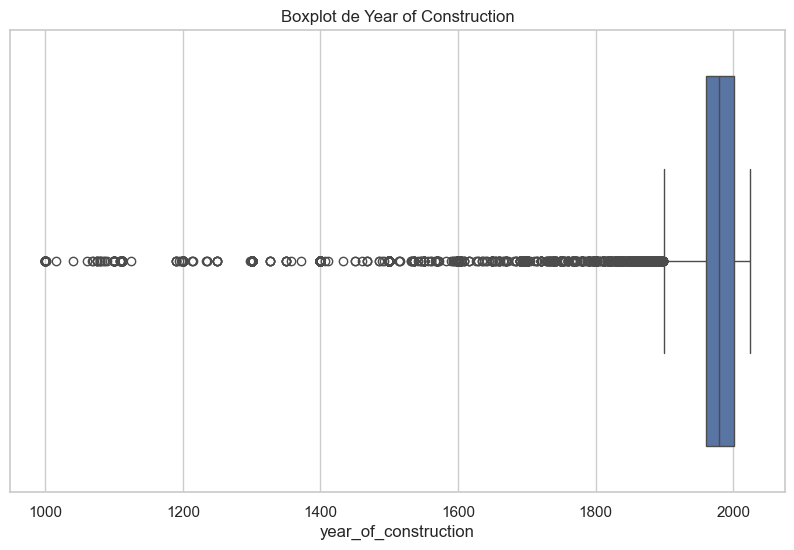

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dfh4['year_of_construction'])
plt.title('Boxplot de Year of Construction')
plt.show()

In [118]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = dfh4['year_of_construction'].quantile(0.25)
Q3 = dfh4['year_of_construction'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites para considerar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print('límite inferior:', limite_inferior)
print('límite superior:', limite_superior)

límite inferior: 1898.5
límite superior: 2062.5


In [120]:
# Filtrar los outliers
dfh5 = dfh4[(dfh4['year_of_construction'] >= limite_inferior) & (dfh4['year_of_construction'] <= limite_superior)]

# Imprimir el número de filas antes y después de la eliminación
print(f'Número de filas originales: {dfh4.shape[0]}')
print(f'Número de filas sin outliers: {dfh5.shape[0]}')

Número de filas originales: 163657
Número de filas sin outliers: 156069


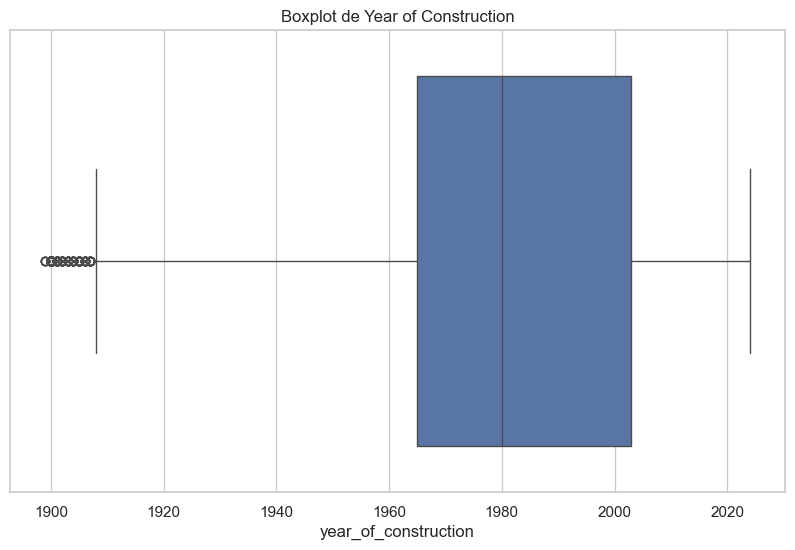

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dfh5['year_of_construction'])
plt.title('Boxplot de Year of Construction')
plt.show()

<Figure size 1200x1000 with 0 Axes>

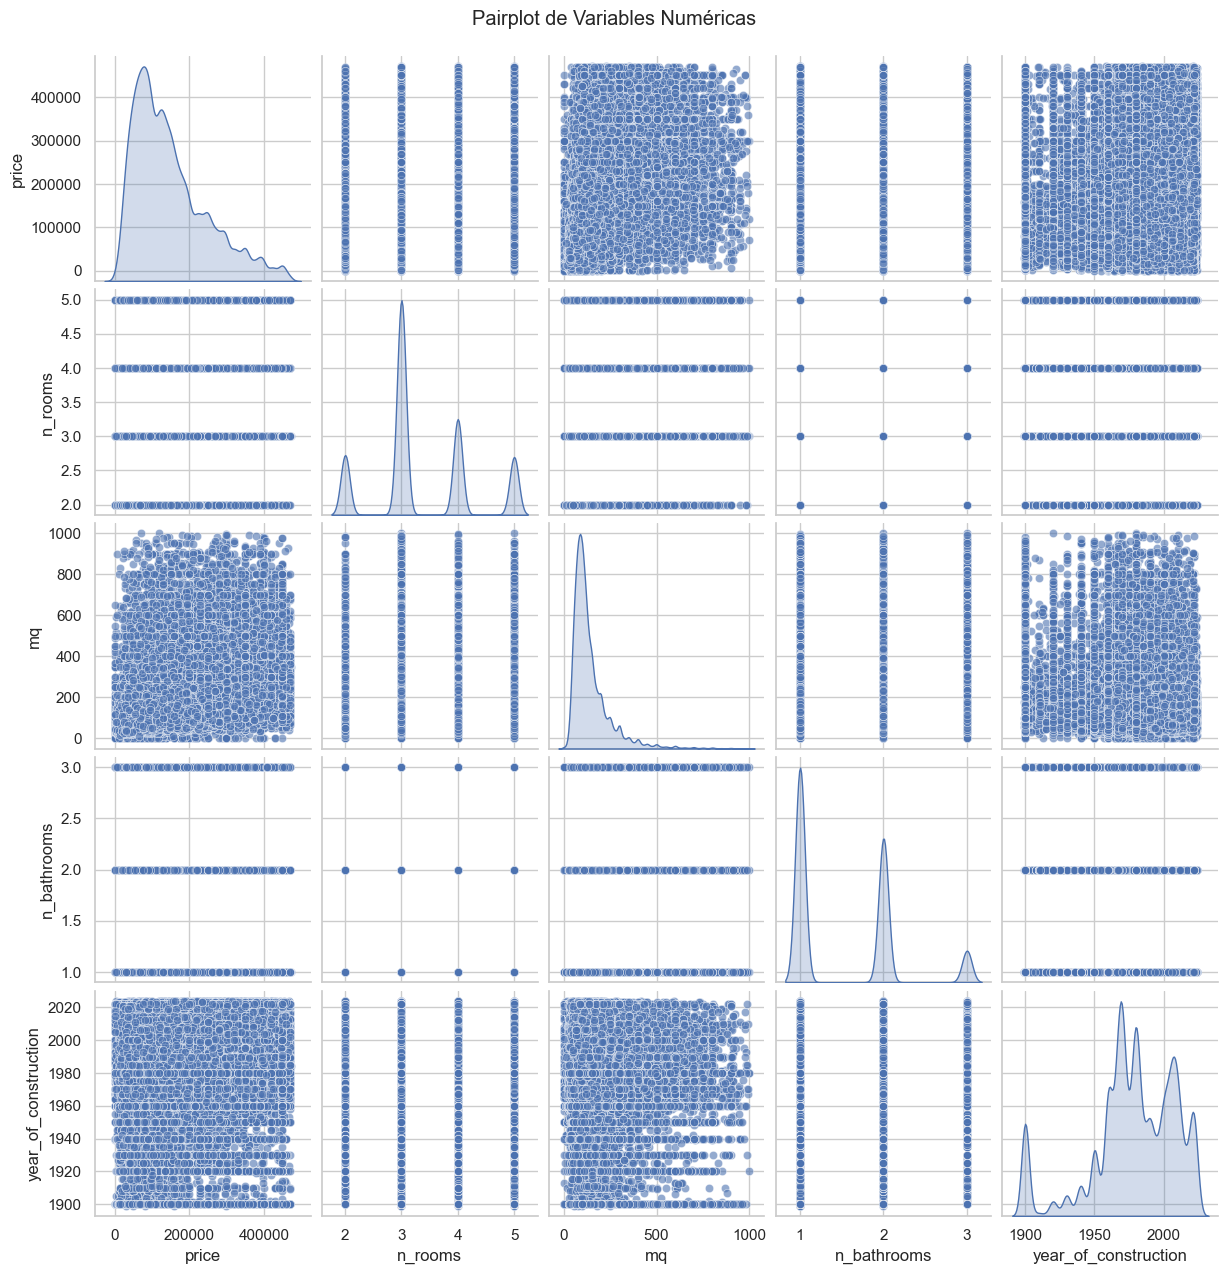

In [124]:
numeric_columns = ['price', 'n_rooms', 'mq', 'n_bathrooms', 'year_of_construction']
plt.figure(figsize=(12, 10))
sns.pairplot(dfh5[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()

#### Modelos de regresión

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = dfh5.drop('price', axis=1)
y = dfh5['price']
train_input, test_input, train_output, test_output = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(train_input, train_output)
print(f'Score del modelo: {reg.score(test_input, test_output)}')

Score del modelo: 0.3101459985661088


In [128]:
# Function to evaluate models and plot predictions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'Model: {model_name}')
    print(f'Train R^2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R^2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')
    print('-'*40)
    
    # Plot the predictions vs real values
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred_test, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model: Lasso Regression
Train R^2: 0.3073
Test R^2: 0.3101
Test RMSE: 83048.9054
----------------------------------------


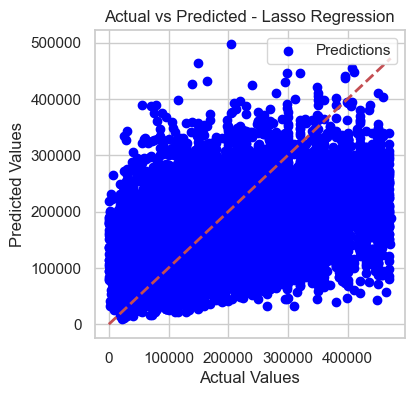

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

lasso_reg = Lasso(alpha=0.1, max_iter=10000)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

In [134]:
X = dfh5.drop('price', axis=1)
y = dfh5['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Función para evaluar el modelo
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f'{model_name} - MSE: {mse:.2f}, R^2: {r2:.2f}')

# Modelos de regresión
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

lasso_reg = Lasso(alpha=0.1, max_iter=10000)  # Aumentar max_iter
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

Linear Regression - MSE: 6897121105.22, R^2: 0.31
Ridge Regression - MSE: 6897120924.48, R^2: 0.31
Lasso Regression - MSE: 6897120690.26, R^2: 0.31
Random Forest Regression - MSE: 4630729821.06, R^2: 0.54


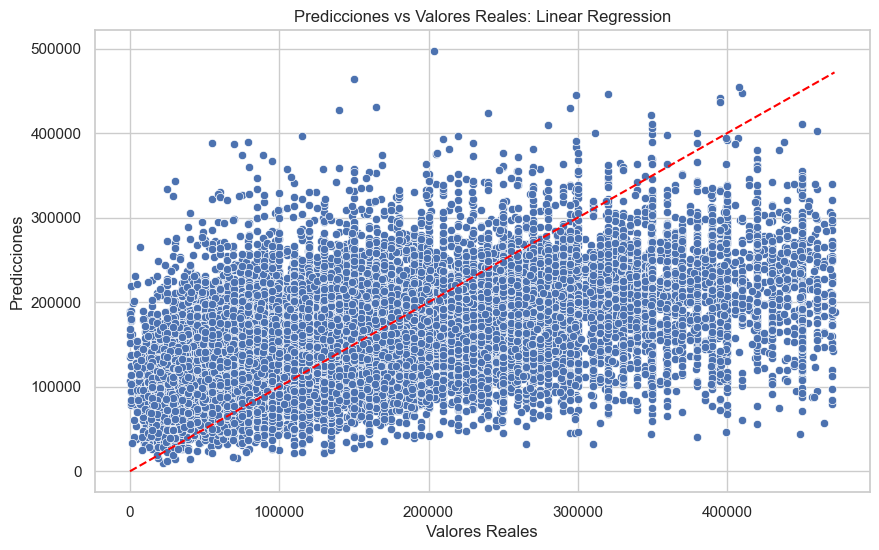

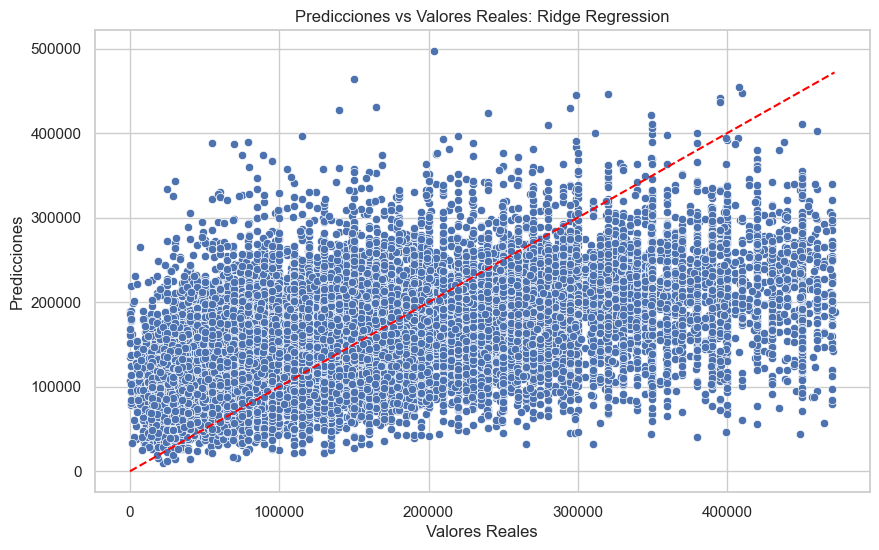

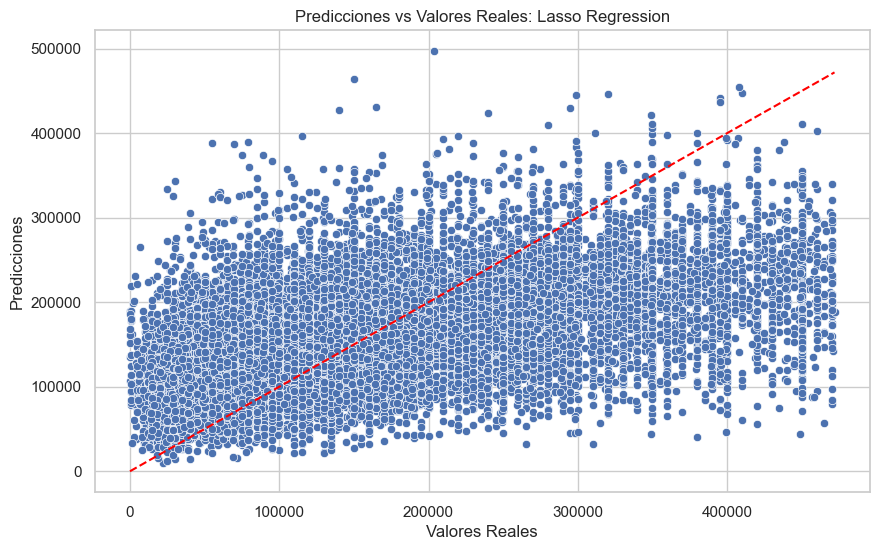

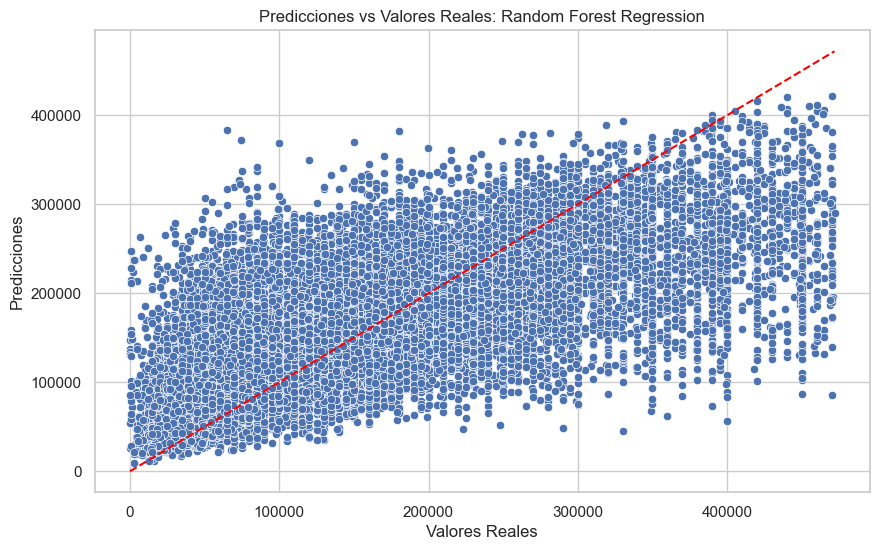

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=predictions)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Línea de referencia
    plt.title(f'Predicciones vs Valores Reales: {model_name}')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.grid(True)
    plt.show()

# Graficar para cada modelo
linear_reg.fit(X_train, y_train)
plot_predictions(linear_reg, X_test, y_test, 'Linear Regression')

ridge_reg.fit(X_train, y_train)
plot_predictions(ridge_reg, X_test, y_test, 'Ridge Regression')

lasso_reg.fit(X_train, y_train)
plot_predictions(lasso_reg, X_test, y_test, 'Lasso Regression')

rf_reg.fit(X_train, y_train)
plot_predictions(rf_reg, X_test, y_test, 'Random Forest Regression')

####  Aplicación de datos de pruebas

In [138]:
test_df = pd.read_csv('test_housing_data_italy.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             10000 non-null  float64
 1   location              10000 non-null  object 
 2   title                 10000 non-null  object 
 3   price                 8362 non-null   float64
 4   n_rooms               7525 non-null   float64
 5   floor                 6737 non-null   float64
 6   mq                    9855 non-null   float64
 7   n_bathrooms           9407 non-null   float64
 8   year_of_construction  10000 non-null  float64
 9   availability          10000 non-null  object 
 10  energy_class          9969 non-null   object 
 11  status                10000 non-null  object 
 12  heating               10000 non-null  object 
 13  has_garage            10000 non-null  int64  
 14  has_terrace           10000 non-null  int64  
 15  has_garden          

In [140]:
# Contar cuántos renglones hay antes de eliminar duplicados
initial_count = test_df.shape[0]
# Quitar renglones duplicados
df_t = test_df.drop_duplicates()
# Contar cuántos renglones hay después
final_count = df_t.shape[0]
# Calcular cuántos se eliminaron
duplicates_removed = initial_count - final_count
# Mostrar el resultado
print(f"Número de renglones duplicados eliminados: {duplicates_removed}")

Número de renglones duplicados eliminados: 3


In [142]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_t['location_encoded'] = label_encoder.fit_transform(df_t['location'])
df_t['energy_class_encoded'] = label_encoder.fit_transform(df_t['energy_class'])

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\321102986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['location_encoded'] = label_encoder.fit_transform(df_t['location'])
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\321102986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['energy_class_encoded'] = label_encoder.fit_transform(df_t['energy_class'])


In [144]:
print("Before: ", df_t.shape)
df_t1 = df_t.drop(columns=['timestamp', 'location', 'title', 'availability', 'status', 'heating', 'energy_class', 'floor'])
print("After", df_t1.shape)

Before:  (9997, 28)
After (9997, 20)


In [148]:
count_to_remove = df_t1[df_t1['year_of_construction'] > 2024].shape[0]
print(f"Número de datos que se van a eliminar: {count_to_remove}")

df_t2 = df_t1[df_t1['year_of_construction'] <= 2024]

Número de datos que se van a eliminar: 3


In [150]:
round((df_t2.isnull().sum()/df_t2.shape[0])*100,2)

price                   16.37
n_rooms                 24.75
mq                       1.45
n_bathrooms              5.93
year_of_construction     0.00
has_garage               0.00
has_terrace              0.00
has_garden               0.00
has_balcony              0.00
has_fireplace            0.00
has_alarm                0.00
has_air_conditioning     0.00
has_pool                 0.00
has_parking              0.00
has_elevator             0.00
is_furnished             0.00
latitude                 0.02
longitude                0.02
location_encoded         0.00
energy_class_encoded     0.00
dtype: float64

In [152]:
# Calcular el IQR
Q1 = df_t2['price'].quantile(0.25)
Q3 = df_t2['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_t2[(df_t2['price'] < lower_bound) | (df_t2['price'] > upper_bound)]
print("Número de outliers:", outliers.shape[0])

Número de outliers: 527


In [154]:
# Eliminar outliers del DataFrame
df_t3 = df_t2[(df_t2['price'] >= lower_bound) & (df_t2['price'] <= upper_bound)]
print("Número de datos después de eliminar outliers:", df_t3.shape[0])

Número de datos después de eliminar outliers: 7831


In [156]:
round((df_t3.isnull().sum()/df_t3.shape[0])*100,2)

price                    0.00
n_rooms                 19.95
mq                       0.68
n_bathrooms              2.95
year_of_construction     0.00
has_garage               0.00
has_terrace              0.00
has_garden               0.00
has_balcony              0.00
has_fireplace            0.00
has_alarm                0.00
has_air_conditioning     0.00
has_pool                 0.00
has_parking              0.00
has_elevator             0.00
is_furnished             0.00
latitude                 0.01
longitude                0.01
location_encoded         0.00
energy_class_encoded     0.00
dtype: float64

In [158]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_t3['year_of_construction'].quantile(0.25)
Q3 = df_t3['year_of_construction'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites para considerar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print('límite inferior:', limite_inferior)
print('límite superior:', limite_superior)

límite inferior: 1894.0
límite superior: 2070.0


In [172]:
# Filtrar los outliers
df_t4 = df_t3[(df_t3['year_of_construction'] >= limite_inferior) & (df_t3['year_of_construction'] <= limite_superior)]

# Imprimir el número de filas antes y después de la eliminación
print(f'Número de filas originales: {df_t3.shape[0]}')
print(f'Número de filas sin outliers: {df_t4.shape[0]}')

Número de filas originales: 7831
Número de filas sin outliers: 7498


In [174]:
# Imputar la mediana para las columnas numéricas
median_imputer = SimpleImputer(strategy='median')
# Columnas numéricas para imputar con la mediana
num_cols = ['latitude', 'longitude', 'mq']
df_t4[num_cols] = median_imputer.fit_transform(df_t4[num_cols])
# Imputar la moda para las columnas categóricas
mode_imputer = SimpleImputer(strategy='most_frequent')
# Columnas categóricas para imputar con la moda
cat_cols = ['n_rooms', 'n_bathrooms']
df_t4[cat_cols] = mode_imputer.fit_transform(df_t4[cat_cols])

print('\nNulos en los datos después de la imputación:\n', df_t4.isnull().sum())


Nulos en los datos después de la imputación:
 price                   0
n_rooms                 0
mq                      0
n_bathrooms             0
year_of_construction    0
has_garage              0
has_terrace             0
has_garden              0
has_balcony             0
has_fireplace           0
has_alarm               0
has_air_conditioning    0
has_pool                0
has_parking             0
has_elevator            0
is_furnished            0
latitude                0
longitude               0
location_encoded        0
energy_class_encoded    0
dtype: int64


C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\2320416436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t4[num_cols] = median_imputer.fit_transform(df_t4[num_cols])
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13012\2320416436.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t4[cat_cols] = mode_imputer.fit_transform(df_t4[cat_cols])


#### Aplicación del modelo con los datos de entramiento a datos de prueba

In [197]:
X = dfh5.drop('price', axis=1)
y = dfh5['price']

# Escalador
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definición de los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=10000),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Función para evaluar el modelo
def evaluate_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model  # Retornar el modelo entrenado

# Entrenar modelos y almacenar
trained_models = {}
for model_name, model in models.items():
    trained_models[model_name] = evaluate_model(model, X_train, y_train)

# Escalar df_t4
X_t4 = df_t4.drop('price', axis=1)

X_t4 = X_t4[X.columns]

# Escalar X_t4
X_t4_scaled = scaler.transform(X_t4)

# Calcular y mostrar R^2 para cada modelo en df_t4
for model_name, model in trained_models.items():
    predictions_t4 = model.predict(X_t4_scaled)
    
    y_true = df_t4['price']  
    r2 = r2_score(y_true, predictions_t4)
    print(f'{model_name} - R^2: {r2:.2f}')

Linear Regression - R^2: 0.32
Ridge Regression - R^2: 0.32
Lasso Regression - R^2: 0.32
Random Forest Regression - R^2: 0.53


#### Técnica de reducción de dimensionalidad

In [150]:
# Aplicar un método de reducción de dimensionalidad
numeric_columns = dfh5.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfh4[numeric_columns])

In [154]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')

Varianza explicada por cada componente: [0.1144931  0.09867893]


#### Reducción de dimensionalidad.

#### PCA

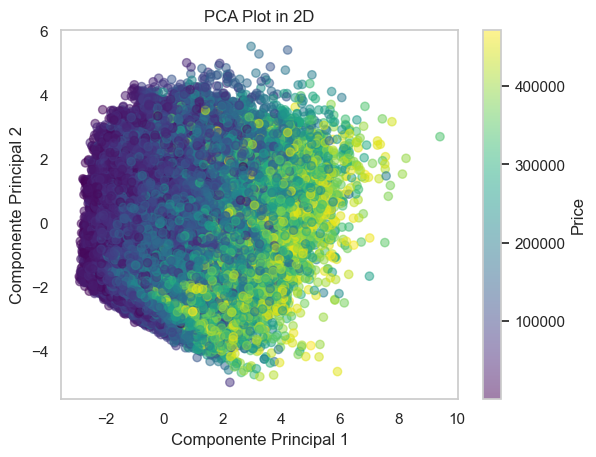

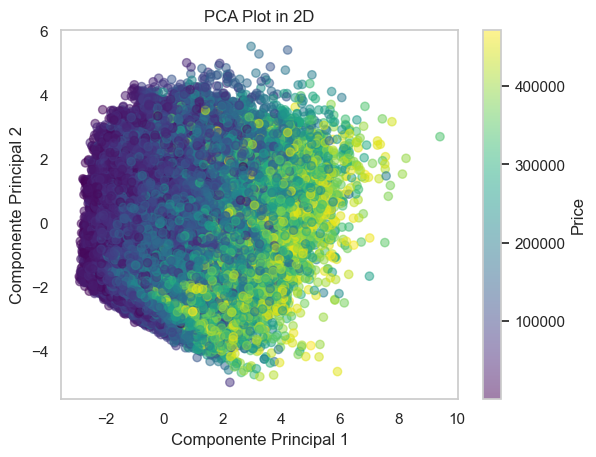

In [166]:
numeric_columns = dfh5.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfh5[numeric_columns])

X_PCA = PCA(n_components=2).fit_transform(scaled_data)

y = dfh5['price']

# Crear el gráfico de dispersión
scatter = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA Plot in 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Price')
plt.grid()
plt.show()

y = dfh5['price']

# Crear el gráfico de dispersión
scatter = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA Plot in 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Price')  
plt.grid()
plt.show()

#### UMAP

D:\Documentos\PHYTON\Phyton programa\1 CSharp\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


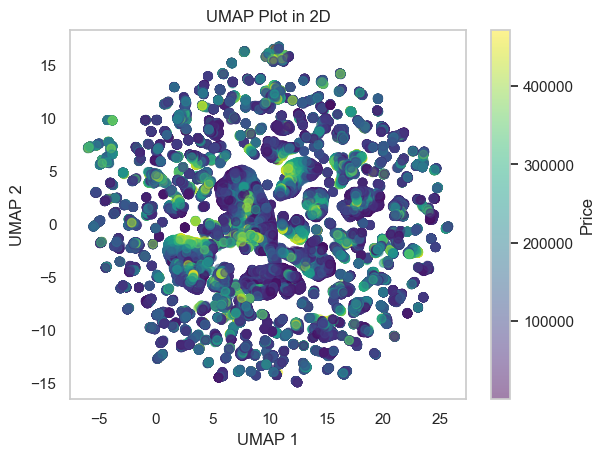

In [168]:
import umap

umap_model = UMAP(n_components=2, n_neighbors=15, random_state=42)
X_umap = umap_model.fit_transform(scaled_data)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('UMAP Plot in 2D')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Price')
plt.grid()
plt.show()

#### Discusión y conclusiones

###### A partir de un conjunto de datos recopilados sobre características de venta de casas en Italia, se identificaron diversas variables importantes, siendo el precio (Price) la más relevante en comparación con otras características. Se realizó un análisis exploratorio y una extracción de características, así como la aplicación de dos técnicas de selección de características, lo que permitió obtener información significativa sobre la localidad, la clase energética y el año de construcción.

###### Se aplicaron cuatro modelos de regresión, cuyos resultados fueron los siguientes: regresión lineal (R²: 0.31), regresión Ridge (R²: 0.31), regresión Lasso (R²: 0.31) y, finalmente, regresión por Random Forest (R²: 0.54). Este último modelo mostró el mejor ajuste a los datos de entrenamiento. Tras obtener los resultados, se aplicó el modelo a un conjunto de datos de prueba, logrando un ajuste de R²: 0.53.

###### En conclusión, la limpieza de datos y la extracción de características resultaron cruciales para alcanzar el mejor ajuste en los modelos de regresión utilizados. Además, al aplicar los modelos ajustados a los datos de prueba, se obtuvo un rendimiento superior con el modelo de regresión por Random Forest.